# Student Performance Indicator

## Steps:

    - Understand Problem Statement
    - Data Collect
    - Data Cleaning
    - EDA
    - Data Pre-process
    - Model Train
    - Choose best model


## 1) Problem Statement

    - This project understands how the student's perfrmance (test scores) affected by other variables such as gender, ethnicity, parental level of education , lunch and test preparation course.

## 2) Data Collection 

    - source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    - 8 columns and 1000 rows

Import pandas, numpy,matplotlib, seaborn, an warningg library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


import csv as pandas dataframe


In [40]:
df = pd.read_csv('D:\\vscode numpy\\END-TO-END PROJECTS\\notebook\\data\\stud.csv')

show top 5

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# data cleaning
    - missing values
    - nans
    - duplicate
    - unique value of each column
    - check categorical columns

In [42]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 no nulls

In [43]:
df.isna().sum()     

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
df.duplicated().sum()   

0

no duplicates

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checkin data type:

    - 5 categorical columns
    - 3 numerical columns

In [46]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

unique values of each column

In [47]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


stats of data

In [48]:
print('categories in gender variable :    ',end=' ')
print(df['gender'].unique())

print('categories in race/ethnicity variable :    ',end=' ')
print(df['race/ethnicity'].unique())        

print('categories in parental level of education variable :    ',end=' ')
print(df['parental level of education'].unique())   

print('categories in lunch variable :    ',end=' ')
print(df['lunch'].unique())

print('categories in test preparation course variable :    ',end=' ')
print(df['test preparation course'].unique())


categories in gender variable :     ['female' 'male']
categories in race/ethnicity variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable :     ['standard' 'free/reduced']
categories in test preparation course variable :     ['none' 'completed']


In [49]:
# defining categorical and numerical columns

categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']

# printing categorical and numerical columns
print('We have {} categorical columns : {}'.format(len(categorical_columns),categorical_columns))
print('\nWe have {} numerical columns : {}'.format(len(numerical_columns),numerical_columns))


We have 5 categorical columns : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

We have 3 numerical columns : ['math score', 'reading score', 'writing score']


In [50]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()  
math_full = df[df['math score'] == 100]['average score'].count()    
print('Number of students with full score in reading : ',reading_full)
print('Number of students with full score in writing : ',writing_full)  
print('Number of students with full score in math : ',math_full)


Number of students with full score in reading :  17
Number of students with full score in writing :  14
Number of students with full score in math :  7


In [52]:
reading_less_20 = df[df['reading score'] < 20]['average score'].count() 
writing_less_20 = df[df['writing score'] < 20]['average score'].count()
math_less_20 = df[df['math score'] < 20]['average score'].count()
print('Number of students with less than 20 score in reading : ',reading_less_20)
print('Number of students with less than 20 score in writing : ',writing_less_20)  
print('Number of students with less than 20 score in math : ',math_less_20  )


Number of students with less than 20 score in reading :  1
Number of students with less than 20 score in writing :  3
Number of students with less than 20 score in math :  4


# visualizaion

    histogram
    kde

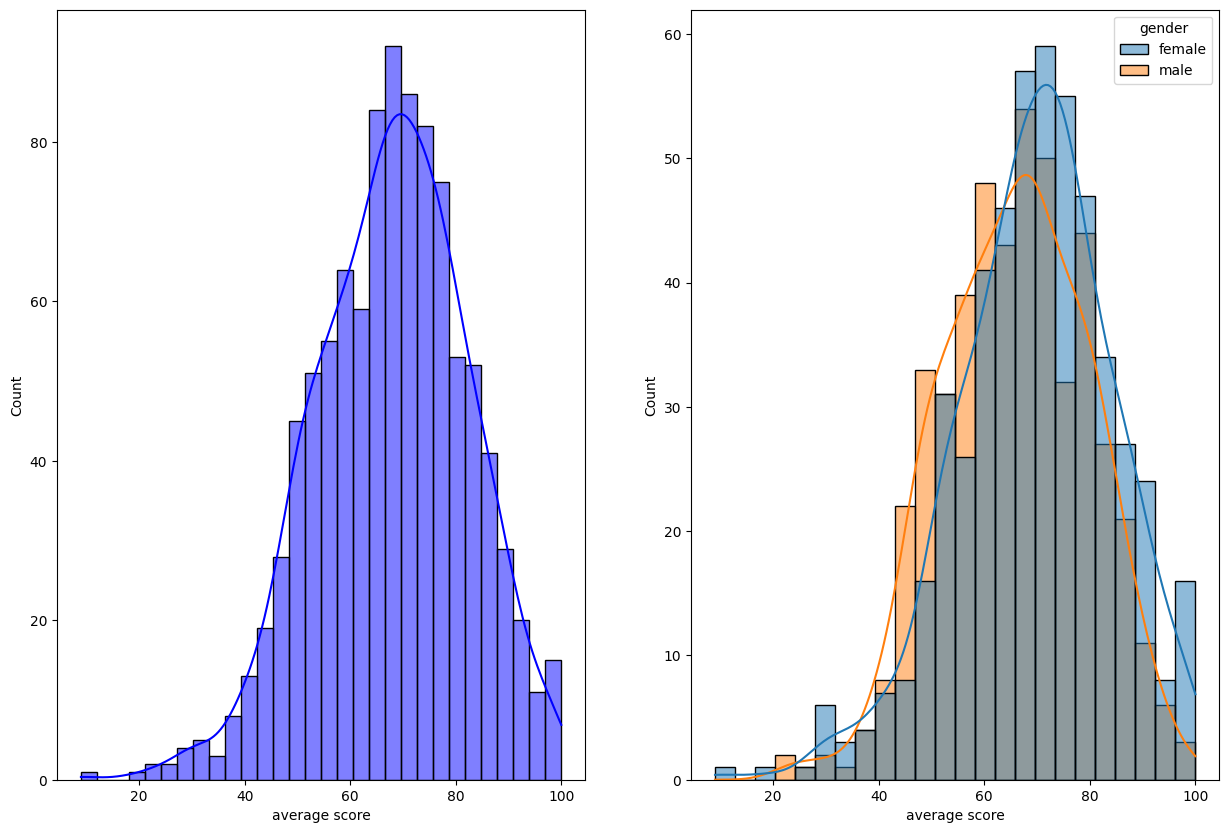

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df, x='average score', kde=True, color='blue', bins=30)
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()  



In [54]:
# ladies have better average scores than gents.

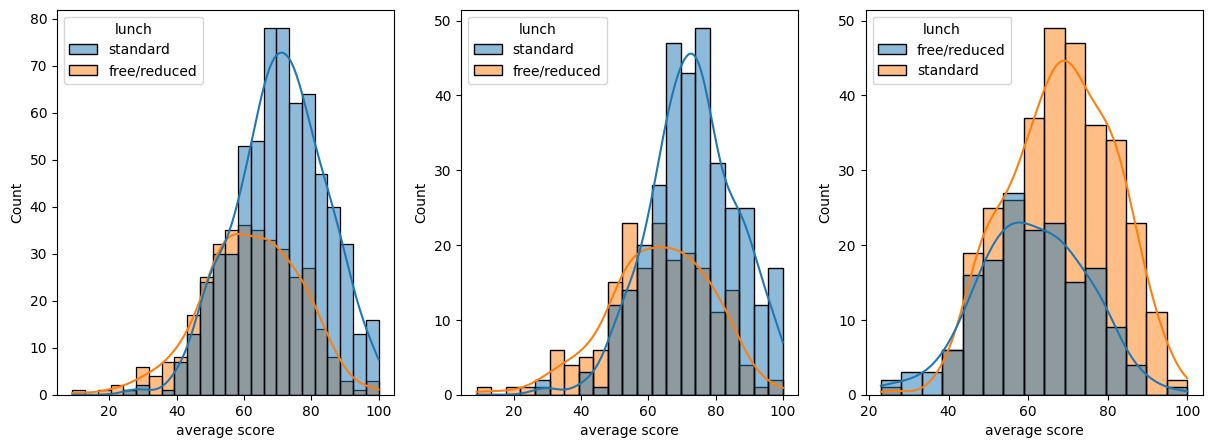

In [56]:
plt.subplots(1,3, figsize=(20,5))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='lunch')
plt.show()